# GRU Mini-Project

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper methods

In [3]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Data

In [5]:
dataset = pd.read_csv('../../DataSets/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [12]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

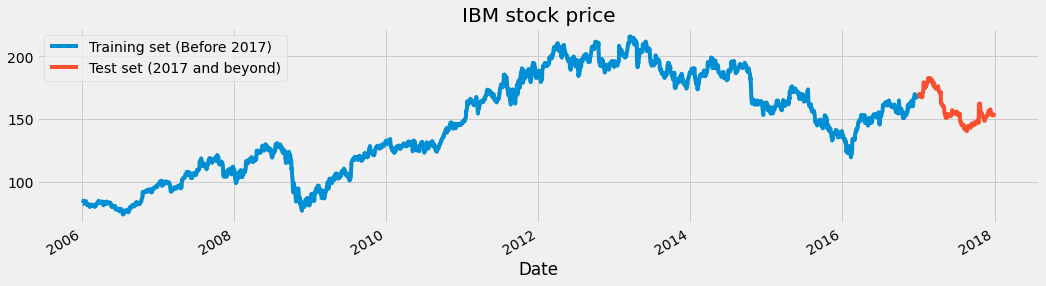

In [9]:
dataset['High'][:'2016'].plot(figsize=(16,4),legend=True)
dataset['High']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)', 
           'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Model

In [18]:
model = Sequential()

# First GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation="tanh"))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation="tanh"))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation="tanh"))
model.add(Dropout(0.2))
# Forth GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation="tanh"))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 60, 50)           

## Training

In [19]:
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9,
                           nesterov=False), loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
19/19 [==============================] - 2s 102ms/step - loss: 0.1398
Epoch 2/50
19/19 [==============================] - 2s 98ms/step - loss: 0.0607
Epoch 3/50
19/19 [==============================] - 2s 93ms/step - loss: 0.0354
Epoch 4/50
19/19 [==============================] - 2s 100ms/step - loss: 0.0165
Epoch 5/50
19/19 [==============================] - 2s 99ms/step - loss: 0.0122
Epoch 6/50
19/19 [==============================] - 2s 99ms/step - loss: 0.0111
Epoch 7/50
19/19 [==============================] - 2s 101ms/step - loss: 0.0105
Epoch 8/50
19/19 [==============================] - 2s 100ms/step - loss: 0.0101
Epoch 9/50
19/19 [==============================] - 2s 98ms/step - loss: 0.0099
Epoch 10/50
19/19 [==============================] - 2s 98ms/step - loss: 0.0097
Epoch 11/50
19/19 [==============================] - 2s 97ms/step - loss: 0.0095
Epoch 12/50
19/19 [==============================] - 2s 94ms/step - loss: 0.0094
Epoch 13/50
19/19 [==============

## Testing

In [21]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [23]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = model.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

ValueError: Found array with dim 3. Estimator expected <= 2.

ValueError: x and y can be no greater than 2-D, but have shapes (251,) and (251, 60, 1)

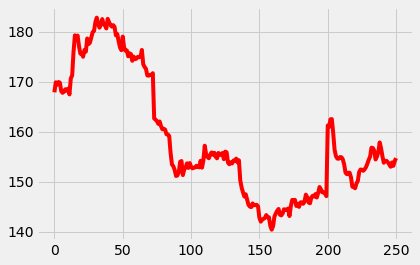

In [24]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [25]:
return_rmse(test_set,GRU_predicted_stock_price)

ValueError: Found array with dim 3. Estimator expected <= 2.